<a href="https://colab.research.google.com/github/jfdelosrios/r-basic/blob/master/tareas/Tarea_09_Ejercicio_completo_de_DataFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carga el CSV de la carpeta de datos del tema llamado run.csv y responde a las siguientes preguntas.

In [86]:
import pandas as pd

df = pd.read_csv(
      'https://raw.githubusercontent.com/joanby/r-basic/master/data/run.csv', 
      delimiter=",", 
      decimal=".", 
      index_col=[0],
      dtype={
          'hace.deporte':'category',
          'fuma':'category',
          'genero':'category',
          'tipo.actividad':'category'
      }
    )

print(df.dtypes)

df.head()

pulso.antes          int64
pulso.despues        int64
hace.deporte      category
fuma              category
genero            category
altura             float64
peso                 int64
tipo.actividad    category
dtype: object


,pulso.antes,pulso.despues,hace.deporte,fuma,genero,altura,peso,tipo.actividad
1,48,54,no,si,H,68.0,150,nula
2,54,56,no,si,H,69.0,145,moderada
3,54,50,no,no,H,69.0,160,moderada
4,58,70,si,no,H,72.0,145,moderada
5,58,58,no,no,H,66.0,135,intensa


1. Indica cuantos estudiantes formaron parte del estudio de deporte

In [87]:
print("Numero de estudiantes: {}".format(len(df)));

Numero de estudiantes: 92


2. Indica cuantos individuos son hombres y cuantos son mujeres

In [88]:
print("Numero de hombres: {}".format(len(df[df.genero == "H"])));
print("Numero de mujeres: {}".format(len(df[df.genero == "M}"])));

Numero de hombres: 57
Numero de mujeres: 0


3. Calcula el porcentaje medio de variación del pulso por minuto entre antes y después de hacer ejercicio y compara el valor de los que hacen ejercicio habitualmente y los que no. ¿Observas mucha diferencia?

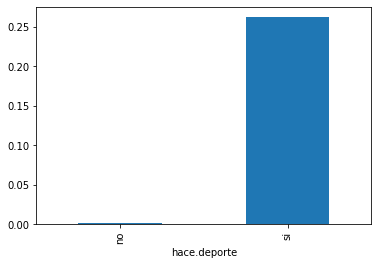

In [89]:
df['tasa'] = df['pulso.despues']/df['pulso.antes'] - 1
    
df.groupby(by= ['hace.deporte']).mean()['tasa'].plot(kind = 'bar')

Calcula el porcentaje medio de variación del pulso por minuto entre antes y después de hacer ejercicio  para los estudiantes que hacen ejercicio habitualmente y compara el valor de los hombres con el de las mujeres. ¿Observas mucha diferencia?

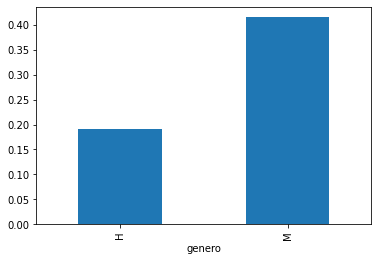

In [90]:
df['tasa'] = df['pulso.despues']/df['pulso.antes'] - 1
    
df[df['hace.deporte'] == "si"].groupby(by= ["genero"]).mean()['tasa'].plot(kind = 'bar')

Las mujeres tienden a agitarse mas que los hombres.

Calcula el porcentaje medio de variación del pulso por minuto entre antes y después de hacer ejercicio para los estudiantes que no hacen ejercicio habitualmente y compara el valor de los fumadores con los no fumadores. ¿Observas mucha diferencia?

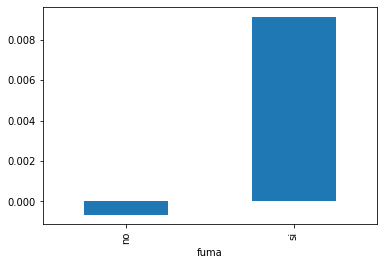

In [91]:
df['tasa'] = df['pulso.despues']/df['pulso.antes'] - 1
          
df[df['hace.deporte'] == "no"].groupby(by= ["fuma"]).mean()['tasa'].plot(kind = 'bar')

El fumador se agita mas que el no fumador.

Calcula el porcentaje medio de variación del pulso por minuto entre antes y después de hacer ejercicio de todos los estudiantes según el tipo de actividad física que realizan. ¿Observas alguna diferencia?

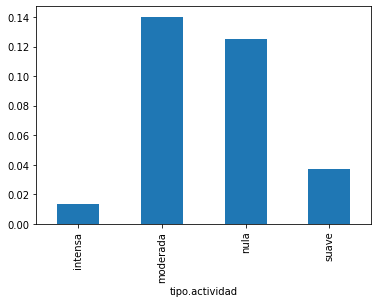

In [92]:
df['tasa'] = df['pulso.despues']/df['pulso.antes'] - 1
          
df.groupby(by= ['tipo.actividad']).mean()['tasa'].plot(kind = 'bar')

Los que desarrollan actividad fisica moderada se agitan mas que el resto, Posiblemente eligieron un nicho que practicaba un deporte muy diferente con respecto al que hicieron el estudio.